# Exploratory Analysis of Data:

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest, chi2
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import metrics, svm
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, precision_score, recall_score
from datetime import datetime
from datetime import date
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn import pipeline

# Importing Data Using Pandas:

In [2]:
df_cf = pd.read_csv('cf.csv')

In [3]:
df_bold = pd.read_csv('bold.csv')

In [4]:
df_tele = pd.read_csv('tele.csv')

In [5]:
df_merged = df_bold.merge(df_cf, how='inner', on='sub_id')

In [6]:
for i in df_merged.columns:
    if df_merged[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(df_merged[i].value_counts())
        print()
        print()

sub_date

the values are:
29/11/2021    74
31/01/2021    74
11/01/2021    73
07/03/2021    71
27/03/2021    68
              ..
21/06/2021     1
01/02/2020     1
05/02/2020     1
31/12/2019     1
03/01/2020     1
Name: sub_date, Length: 895, dtype: int64


city

the values are:
London              4524
London               431
Manchester           382
Glasgow              312
Bristol              298
                    ... 
Warwickshire           1
Kirkby Overblow        1
Chipstead              1
SAXMUNDHAM             1
South Tyneside         1
Name: city, Length: 4646, dtype: int64


billing

the values are:
London                4344
London                 431
Manchester             363
Glasgow                316
Bristol                297
                      ... 
Porthmadog               1
SANDOWN                  1
Chalfont St Giles        1
West Kilbride            1
Balham                   1
Name: billing, Length: 4713, dtype: int64


failed

the values are:
No     22025
Ye

In [7]:
df_tele['used_fin_or_prop'] = df_tele['used_fin_or_prop'].str.lower()
df_tele['used_min_or_reg'] = df_tele['used_min_or_reg'].str.lower()
df_merged['used_fin_or_prop'] = df_merged['used_fin_or_prop'].str.lower()
df_merged['used_min_or_reg'] = df_merged['used_min_or_reg'].str.lower()

In [8]:
df_tele['date_of_birth'] = df_tele['date_of_birth'].astype('str')
df_tele['date_of_birth'] = pd.to_datetime(df_tele['date_of_birth'], dayfirst=True)

In [9]:
now = pd.to_datetime('now')
df_tele['age'] = (now - df_tele['date_of_birth']).astype('<m8[Y]')

In [10]:
df_tele['age'] = df_tele['age'].fillna(df_tele['age'].median())

In [11]:
df_merged['sub_month'] = pd.to_datetime(df_merged['sub_date'], dayfirst=True).dt.month

In [12]:
df_merged.head()

,sub_id,paused,sub_date,order_count,city,billing,failed,failed_count,price,product,value,discount,refund_count,orders_count,total_spent,used_fin_or_prop,hair_loss_level,used_min_or_reg,date_of_birth,sub_month
0,40344,1,10/01/2020,1,London,London,Yes,3.0,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN,1
1,40344,0,23/01/2020,1,London,London,No,NaN,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN,1
2,40344,0,06/02/2020,1,London,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,15.00,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN,2
3,40344,0,10/02/2020,1,London,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,7.97,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN,2
4,43294,1,14/01/2020,1,London,London,Yes,2.0,10.0,Full Works - 1 month - 10.00 x 1,0.00,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,1


In [13]:
tele_ids = list(df_tele['sub_id'])
df2_ids = list(df_merged['sub_id'])

In [14]:
tele_indices = []
df2_indices = []
for i in range(len(tele_ids)):
    if tele_ids[i] in df2_ids:
        tele_indices.append(i)
        df2_indices.append(df2_ids.index(tele_ids[i]))

In [15]:
print(len(tele_indices))
print(len(df2_indices))

7167
7167


In [16]:
df_merged.head()

,sub_id,paused,sub_date,order_count,city,billing,failed,failed_count,price,product,value,discount,refund_count,orders_count,total_spent,used_fin_or_prop,hair_loss_level,used_min_or_reg,date_of_birth,sub_month
0,40344,1,10/01/2020,1,London,London,Yes,3.0,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN,1
1,40344,0,23/01/2020,1,London,London,No,NaN,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN,1
2,40344,0,06/02/2020,1,London,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,15.00,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN,2
3,40344,0,10/02/2020,1,London,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,7.97,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN,2
4,43294,1,14/01/2020,1,London,London,Yes,2.0,10.0,Full Works - 1 month - 10.00 x 1,0.00,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,1


In [17]:
df_tele.head()

,sub_id,date_of_birth,hair_loss_level,used_fin_or_prop,used_min_or_reg,age
0,14461,1983-04-08,Option 2,no,no,39.0
1,33412,1982-11-11,Option 2,no,no,39.0
2,27121,1985-06-04,Option 4,no,no,37.0
3,33535,1984-05-07,NaN,no,no,38.0
4,33536,1998-02-05,Option 2,no,no,24.0


In [18]:
for i in range(len(df2_indices)):
    df_merged.iloc[[df2_indices[i]], [15]] = df_tele.iloc[[tele_indices[i]], [3]].values[0][0]
    df_merged.iloc[[df2_indices[i]], [16]] = df_tele.iloc[[tele_indices[i]], [2]].values[0][0]
    df_merged.iloc[[df2_indices[i]], [17]] = df_tele.iloc[[tele_indices[i]], [4]].values[0][0]

In [19]:
df = df_merged
df['date_of_birth'] = df['date_of_birth'].astype('str')
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], dayfirst=True)
now = pd.to_datetime('now')
df['age'] = (now - df['date_of_birth']).astype('<m8[Y]')

In [20]:
df.head()

,sub_id,paused,sub_date,order_count,city,billing,failed,failed_count,price,product,...,discount,refund_count,orders_count,total_spent,used_fin_or_prop,hair_loss_level,used_min_or_reg,date_of_birth,sub_month,age
0,40344,1,10/01/2020,1,London,London,Yes,3.0,10.0,Non-Prescription Plan - Monthly Subscription -...,...,0.0,0.0,5,40.0,NaN,NaN,NaN,NaT,1,NaN
1,40344,0,23/01/2020,1,London,London,No,NaN,10.0,Non-Prescription Plan - Monthly Subscription -...,...,0.0,0.0,5,40.0,NaN,NaN,NaN,NaT,1,NaN
2,40344,0,06/02/2020,1,London,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,...,0.0,0.0,5,40.0,NaN,NaN,NaN,NaT,2,NaN
3,40344,0,10/02/2020,1,London,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,...,0.0,0.0,5,40.0,NaN,NaN,NaN,NaT,2,NaN
4,43294,1,14/01/2020,1,London,London,Yes,2.0,10.0,Full Works - 1 month - 10.00 x 1,...,0.0,0.0,1,0.0,NaN,NaN,NaN,NaT,1,NaN


In [21]:
df.describe()

,sub_id,paused,order_count,failed_count,price,value,discount,refund_count,orders_count,total_spent,sub_month,age
count,25046.000000,25046.000000,25046.000000,3774.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,24618.000000
mean,16909.125689,0.673481,3.740078,4.371224,70.221036,191.445247,12.098369,4.966656,5.085642,242.528547,6.004631,33.267447
std,11124.837569,0.468949,4.300027,9.769066,50.695053,192.890971,32.403784,21.999343,5.603586,228.786259,3.553237,9.300308
min,1003.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,7412.000000,0.000000,1.000000,2.000000,34.000000,58.000000,0.000000,0.000000,2.000000,76.000000,3.000000,27.000000
50%,14584.500000,1.000000,2.000000,4.000000,51.000000,132.000000,0.000000,0.000000,3.000000,170.140000,5.000000,31.000000
75%,26017.250000,1.000000,4.000000,4.000000,102.000000,259.985000,15.000000,0.000000,6.000000,349.970000,9.000000,38.000000
max,43294.000000,1.000000,33.000000,179.000000,471.000000,1308.000000,1249.880000,432.000000,69.000000,1682.000000,12.000000,102.000000


In [22]:
df['age'] = df['age'].fillna(df['age'].median())
df['failed_count'] = df['failed_count'].fillna(0.0)

In [23]:
# dividing the cities into 4 tiers

df['city'] = df['city'].fillna(method='ffill')
city_tiers = []
for city in df['city']:
    if df['city'].value_counts()[city]>300:
        city_tiers.append(1)
    elif df['city'].value_counts()[city]>100:
        city_tiers.append(2)
    elif df['city'].value_counts()[city]>5:
        city_tiers.append(3)
    else:
        city_tiers.append(4)

In [24]:
df['city_tier'] = city_tiers

In [25]:
prods = list(df['product'])

In [26]:
prod_list = []
type_list = []
for prod in prods:
    if len(prod.split(' - ')) == 4:
        prod_list.append(prod.split(' - ')[0])
        type_list.append(prod.split(' - ')[2])
    else:
        prod_list.append(prod.split(' - ')[0])
        type_list.append(prod.split(' - ')[1])

In [27]:
df['prod'] = prod_list
df['type'] = type_list

In [28]:
df['prod'][340:364]

340                            Finasteride
341                             Simplicity
342                             Full Works
343                       Non-Prescription
344                             Simplicity
345                             Simplicity
346                             Full Works
347                             Full Works
348                        Full Works Plan
349                             Full Works
350                            Finasteride
351                       Non-Prescription
352                             Simplicity
353                             Full Works
354                             Full Works
355                              Minoxidil
356                       Non-Prescription
357              Biotin & Finasteride Plan
358    Topical Finasteride-Minoxidil Spray
359                       Non-Prescription
360                             Full Works
361                             Full Works
362                             Full Works
363        

In [29]:
df = df.replace({'Full Works Plan': 'Full Works', 
'Full Works Plan Test': 'Full Works', 
'PG Free Full Works': 'Full Works',
'PG Free Minoxidil': 'Minoxidil',
'Topical Finasteride and Minoxidil Plan': 'Topical Finasteride-Minoxidil Spray',
'Topical Spray': 'Minoxidil',
'Combo': 'Duo',
'Simplicity Plan': 'Simplicity',
'Combo Plan': 'Duo',
'PG Free Duo': 'Duo',
'Non-Prescription Plan': 'Non-Prescription',
'Oral Tablet': 'Finasteride',
'PG Free Non-Prescription': 'Non-Prescription'})

In [30]:
df['type'].value_counts()

1 month                 11240
3 months                 9856
6 months                 3932
Monthly Subscription        9
LP299V                      9
Name: type, dtype: int64

In [31]:
df = df.replace({'Monthly Subscription': '1 month',
'LP299V': '1 month'})

In [32]:
df['type'].value_counts()

1 month     11258
3 months     9856
6 months     3932
Name: type, dtype: int64

In [33]:
df = df.replace(list(df['prod'].value_counts().keys())[8:], 'Other')

In [34]:
df['prod'].value_counts()

Full Works                             8797
Other                                  3004
Non-Prescription                       2932
Minoxidil                              2293
Shampoo                                2284
Topical Finasteride-Minoxidil Spray    1748
Finasteride                            1685
Duo                                    1621
Simplicity                              682
Name: prod, dtype: int64

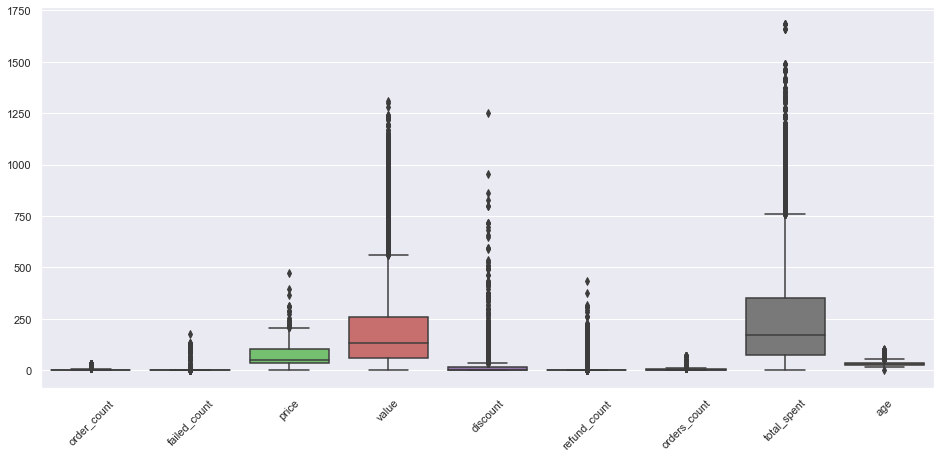

In [35]:
# checking for outliers:

sb.set(style='darkgrid', palette='muted')
fig, ax = plt.subplots(figsize=(16,7))
sb.boxplot(data=df.drop(['sub_id','paused','sub_month','city_tier'],axis=1))
plt.xticks(rotation=45)
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25046 entries, 0 to 25045
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sub_id            25046 non-null  int64         
 1   paused            25046 non-null  int64         
 2   sub_date          25046 non-null  object        
 3   order_count       25046 non-null  int64         
 4   city              25046 non-null  object        
 5   billing           25044 non-null  object        
 6   failed            25046 non-null  object        
 7   failed_count      25046 non-null  float64       
 8   price             25046 non-null  float64       
 9   product           25046 non-null  object        
 10  value             25046 non-null  float64       
 11  discount          25046 non-null  float64       
 12  refund_count      25046 non-null  float64       
 13  orders_count      25046 non-null  int64         
 14  total_spent       2504

In [37]:
cat = ['failed', 'used_fin_or_prop','hair_loss_level','used_min_or_reg','sub_month','city_tier','prod','type'] #categorical
num = ['order_count', 'failed_count','price','value','discount','refund_count','orders_count','total_spent','age'] #numerical

In [38]:
df.columns

Index(['sub_id', 'paused', 'sub_date', 'order_count', 'city', 'billing',
       'failed', 'failed_count', 'price', 'product', 'value', 'discount',
       'refund_count', 'orders_count', 'total_spent', 'used_fin_or_prop',
       'hair_loss_level', 'used_min_or_reg', 'date_of_birth', 'sub_month',
       'age', 'city_tier', 'prod', 'type'],
      dtype='object')

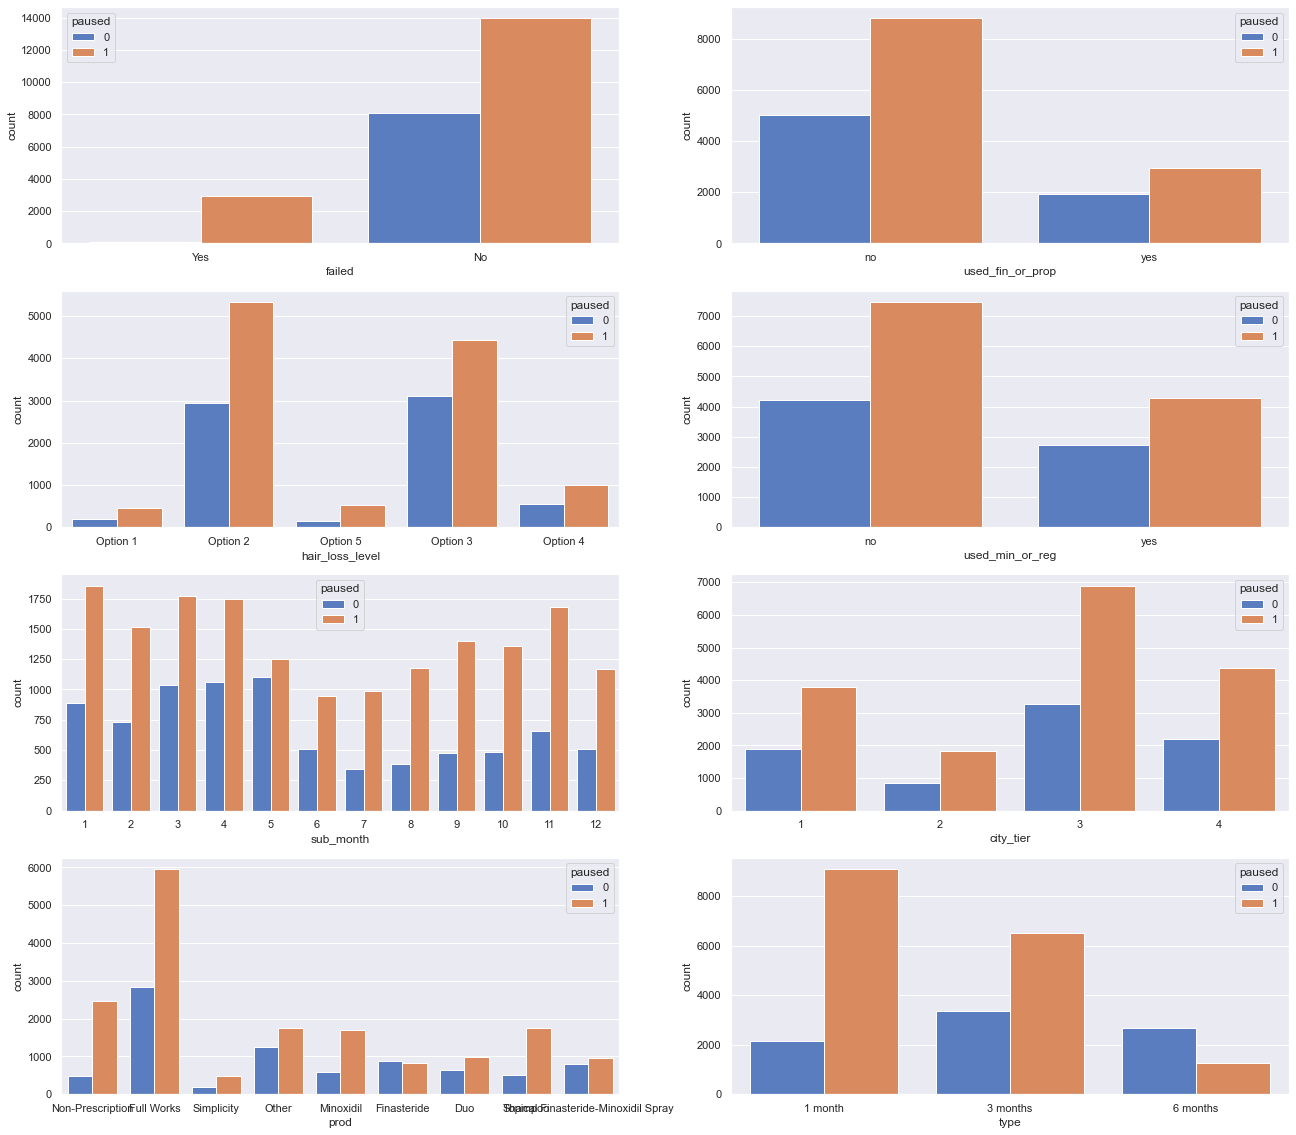

In [39]:
# Visualising categorical variables with their corresponding cancelled level:

fig,ax = plt.subplots(nrows=4,ncols=2,figsize=(22,20))
for col,subplot in zip(cat, ax.flatten()):
    sb.countplot(x = df[col], hue=df.paused, ax=subplot)

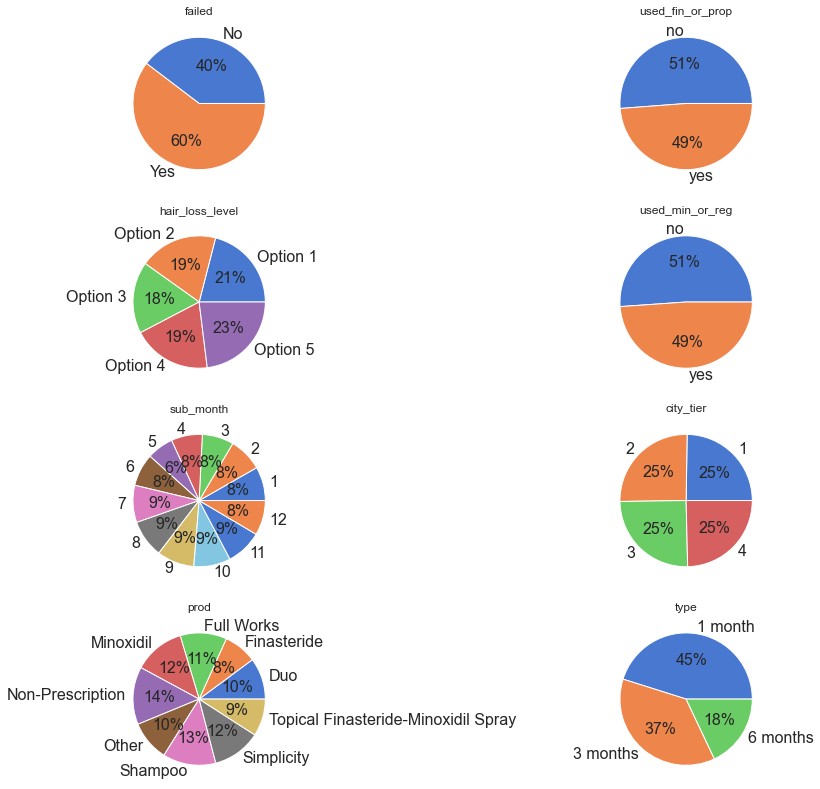

In [45]:
fig, ax = plt.subplots(4, 2, figsize=(16, 14))
plt.rcParams['font.size'] = '16'
for col,subplot in zip(cat, ax.flatten()):
    #calculate percent churn 
    temp = df.groupby(by=df[col]).paused.sum()
    total = df.value_counts(col).sort_index()
    res1 = temp/total*100
    #visualising the result
    subplot.pie(labels = res1.index, x = res1.values, autopct='%.0f%%',textprops={'fontsize': 16})
    subplot.set_title(col)

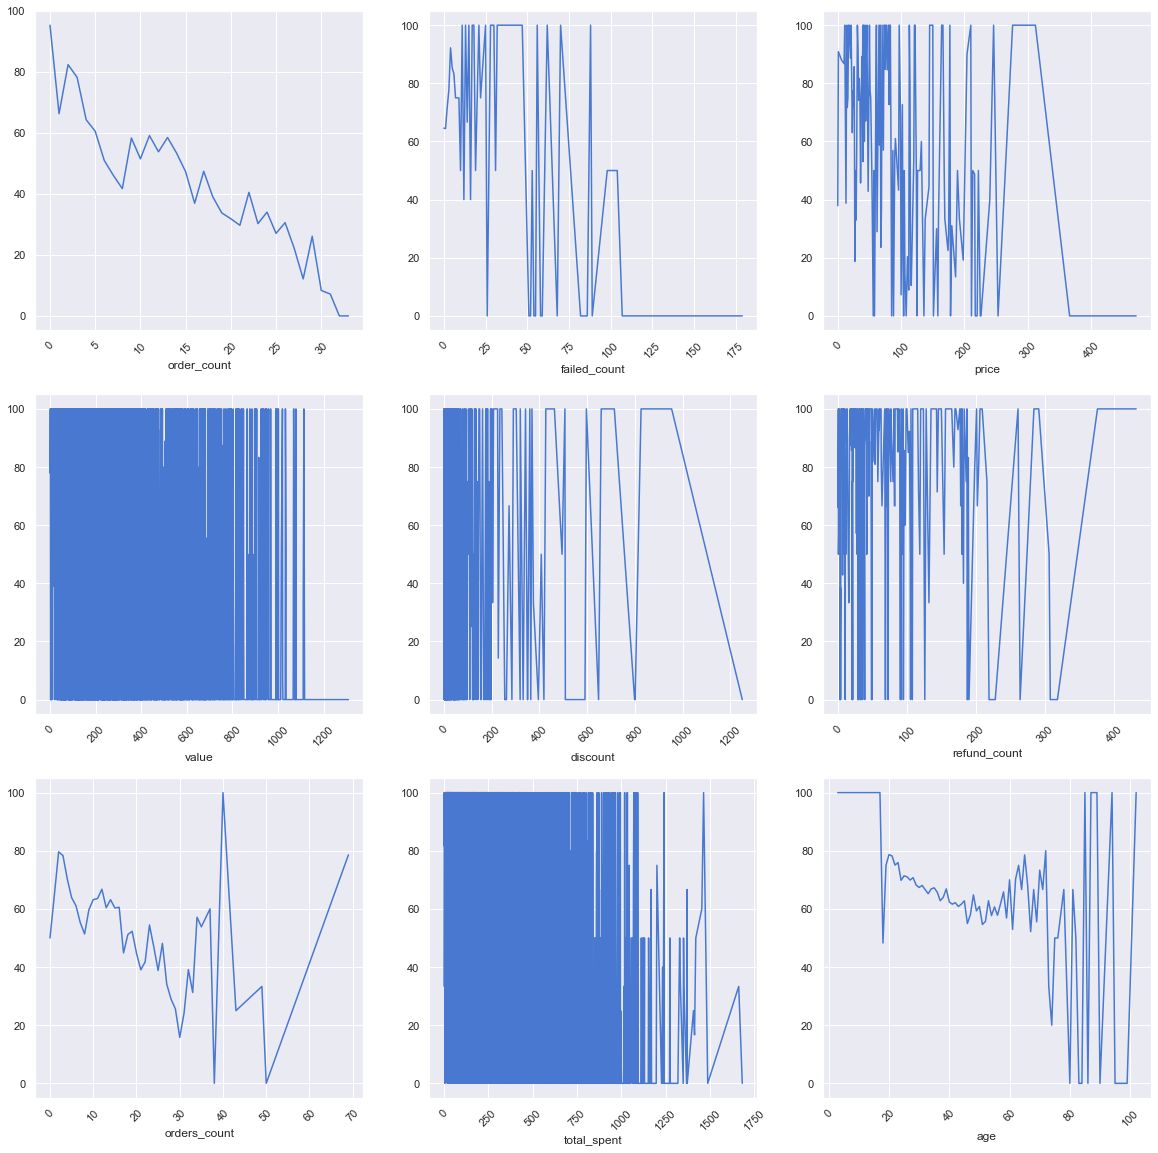

In [41]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for col,subplot in zip(num, ax.flatten()):
    temp = df.groupby(by=df[col]).paused.sum()
    total = df.value_counts(col).sort_index()
    res1 = temp/total*100
    sb.lineplot(x = res1.index, y = res1.values, ax=subplot, )
    subplot.tick_params(axis='x',labelrotation=45)

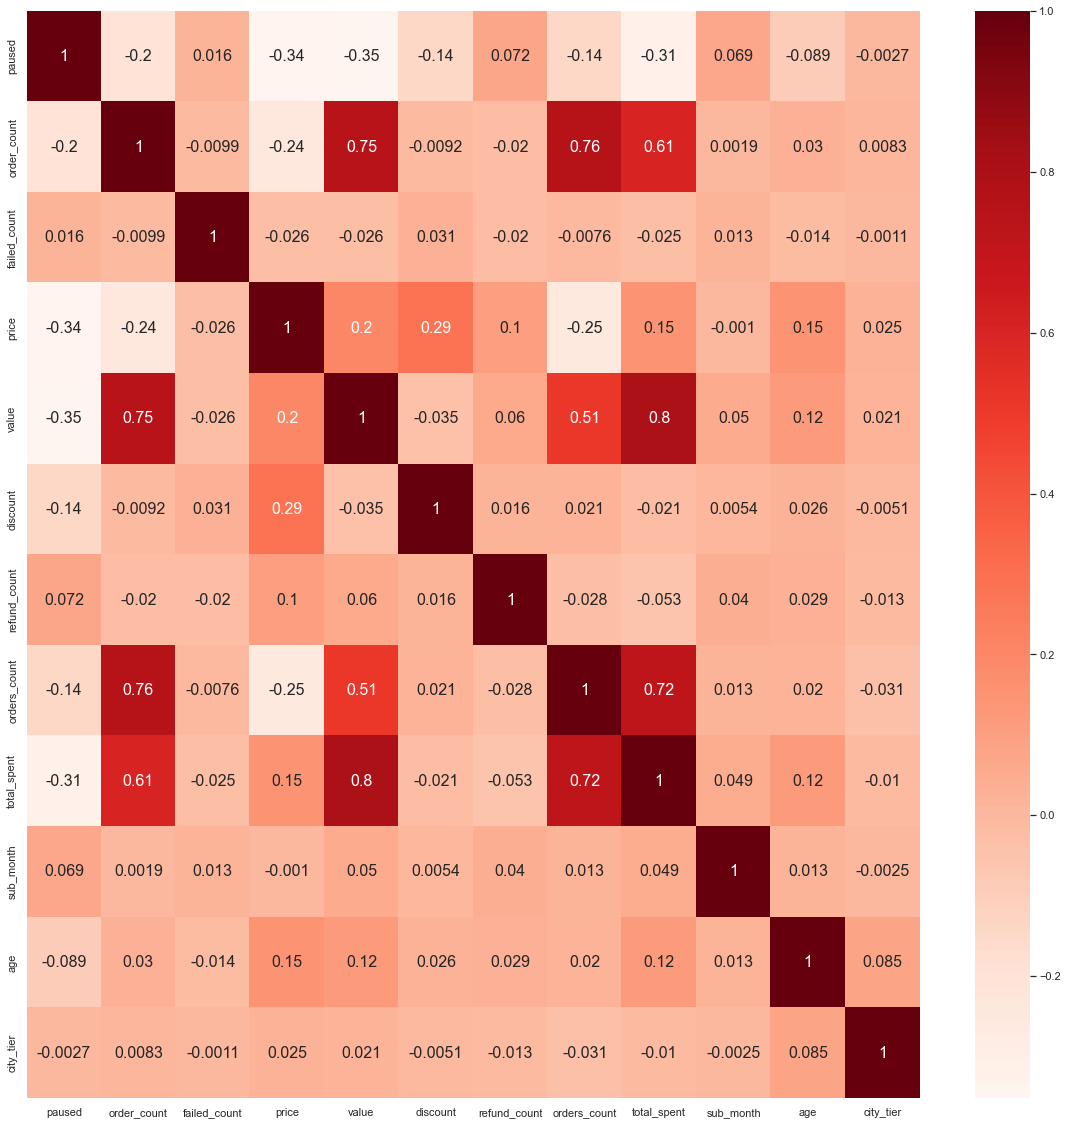

In [48]:
plt.figure(figsize=(20,20))
cor = df.drop('sub_id', axis=1).corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [47]:
df.head()

,sub_id,paused,sub_date,order_count,city,billing,failed,failed_count,price,product,...,total_spent,used_fin_or_prop,hair_loss_level,used_min_or_reg,date_of_birth,sub_month,age,city_tier,prod,type
0,40344,1,10/01/2020,1,London,London,Yes,3.0,10.0,Non-Prescription Plan - Monthly Subscription -...,...,40.0,NaN,NaN,NaN,NaT,1,31.0,1,Non-Prescription,1 month
1,40344,0,23/01/2020,1,London,London,No,0.0,10.0,Non-Prescription Plan - Monthly Subscription -...,...,40.0,NaN,NaN,NaN,NaT,1,31.0,1,Non-Prescription,1 month
2,40344,0,06/02/2020,1,London,London,No,0.0,15.0,Non-Prescription Plan - Monthly Subscription -...,...,40.0,NaN,NaN,NaN,NaT,2,31.0,1,Non-Prescription,1 month
3,40344,0,10/02/2020,1,London,London,No,0.0,15.0,Non-Prescription Plan - Monthly Subscription -...,...,40.0,NaN,NaN,NaN,NaT,2,31.0,1,Non-Prescription,1 month
4,43294,1,14/01/2020,1,London,London,Yes,2.0,10.0,Full Works - 1 month - 10.00 x 1,...,0.0,NaN,NaN,NaN,NaT,1,31.0,1,Full Works,1 month


In [49]:
df.describe()

,sub_id,paused,order_count,failed_count,price,value,discount,refund_count,orders_count,total_spent,sub_month,age,city_tier
count,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000
mean,16909.125689,0.673481,3.740078,0.658668,70.221036,191.445247,12.098369,4.966656,5.085642,242.528547,6.004631,33.228699,2.704224
std,11124.837569,0.468949,4.300027,4.101531,50.695053,192.890971,32.403784,21.999343,5.603586,228.786259,3.553237,9.225179,1.088000
min,1003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000
25%,7412.000000,0.000000,1.000000,0.000000,34.000000,58.000000,0.000000,0.000000,2.000000,76.000000,3.000000,27.000000,2.000000
50%,14584.500000,1.000000,2.000000,0.000000,51.000000,132.000000,0.000000,0.000000,3.000000,170.140000,5.000000,31.000000,3.000000
75%,26017.250000,1.000000,4.000000,0.000000,102.000000,259.985000,15.000000,0.000000,6.000000,349.970000,9.000000,38.000000,4.000000
max,43294.000000,1.000000,33.000000,179.000000,471.000000,1308.000000,1249.880000,432.000000,69.000000,1682.000000,12.000000,102.000000,4.000000
